<a href="https://colab.research.google.com/github/lightfury36/Internship-tasks/blob/main/Implementation_of_simple_liner_regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction using Supervised ML**#

* Predict the percentage of an student based on the no. of study hours.

**Dataset :** http://bit.ly/w-data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import dataset

from google.colab import files
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [4]:
df = pd.read_csv("/content/student_scores.csv")

In [6]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Scores')

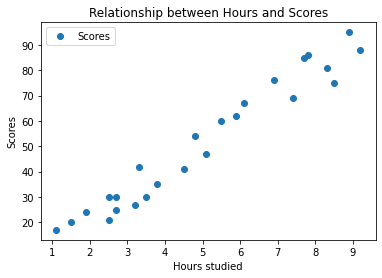

In [13]:
#plot the graph to find the relation between Hours and Scores

df.plot(x="Hours", y="Scores", style='o')
plt.title("Relationship between Hours and Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores")

From above figure, we can clearly see that there is a linear relation between the number of hours studied and score. We an implement simple liner regression on this dataset.

#**Data preprocessing**#

In [19]:
#split the data in to inputs and target varaible

X = df.iloc[:,:1]
#print(X)

Y = df.iloc[:,-1]
#print(Y)

In [20]:
#Split the dataset in to Train and Test model

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

#**Train the model with Linear Regession**#

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
print("Trained the model sucessfully")

Trained the model sucessfully


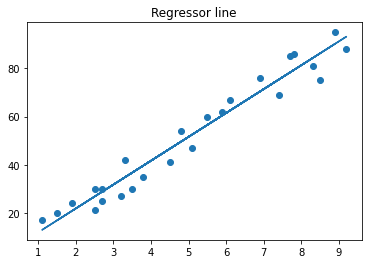

In [24]:
# Plotting the regression line

line = regressor.coef_*X + regressor.intercept_ #y=mx + c

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.title("Regressor line")
plt.show()

# **Making Predictions** #

Now, its time to test our model

In [32]:
y_pred = regressor.predict(X_test)
print(y_pred)


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [45]:
# You can also test with your own data
hours = float(input("Enter the studies hours: "))
own_pred = regressor.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the studies hours: 9.25
No of Hours studied = 9.25
Predicted Score = 93.69173248737539


# **Evaluating the model** #

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

Here, we are going to use Mean Absolute Error (MAE).

MAE = 1 / N * sum for i to N abs(expected[i] - predicted[i])




In [47]:
from sklearn import metrics

error = metrics.mean_absolute_error(Y_test,y_pred)
print("Mean Absolute Error (MAE):", error)

Mean Absolute Error (MAE): 4.183859899002982


A perfect mean absolute error value is 0.0, which means that all predictions matched the expected values exactly.

This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.